In [1]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#1introduction
import numpy as np
import pandas as pd
import json
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim_models

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

D:\Softwares\Anaconda\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [2]:
df = pd.read_excel(r"C:\Users\surya\Desktop\Jupyter Python Programs\Amazon Review NLP\LIWC_Cell_Phone_Reviews.xlsx")
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,...,Affect,tone_pos,tone_neg,emotion,emo_pos,emo_neg,time,focuspast,focuspresent,focusfuture
0,1,False,"09 21, 2004",A5JLAU2ARJ0BO,B0000E3GWH,NaN,Old-and-Wise,This phone is ugly and heavy and has a terribl...,Bad reception,1095724800,...,10.94,4.69,4.69,3.13,0.00,1.56,0.00,0.00,10.94,0.00
1,4,False,"07 24, 2004",A1ACM1CBGORBN1,B0000E3GWH,NaN,Sherry Berry,I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,1090627200,...,4.39,3.41,0.98,0.98,0.49,0.49,4.39,2.20,9.02,2.20
2,3,False,"07 6, 2004",A2V48Q03FZUOSD,B0000E3GWH,NaN,Benjamin David,This is the first Samsung phone I have had and...,Not as user friendly as the Motorola V300-,1089072000,...,5.02,2.34,2.68,2.68,1.00,1.67,2.01,3.01,8.70,0.00
3,5,True,"04 12, 2004",A1V3TRGWOMA8LC,B0000E3GWH,NaN,James Beswick,"..and I'm from Europe, where the phones and ne...",The best phone I've ever owned,1081728000,...,7.27,7.27,0.00,0.00,0.00,0.00,1.82,1.82,7.27,3.64
4,3,False,"02 19, 2004",A3NOBH42C7UI5M,B0000E3GWH,NaN,Kepela,This phone is amazingly small and light for a ...,I love the phone but it has some real problems,1077148800,...,3.04,2.23,0.81,1.62,0.81,0.81,5.26,3.85,6.07,0.81


In [3]:
df = df.sample(frac=0.001)

In [4]:
df.reset_index(drop=True, inplace=True)

In [5]:
df

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,...,Affect,tone_pos,tone_neg,emotion,emo_pos,emo_neg,time,focuspast,focuspresent,focusfuture
0,4,True,"12 11, 2012",A32LW0C77J2M9M,B005V1KFTO,NaN,Jharper016,this is a great slider that boost has.. i have...,Its a great slider for the price,1355184000,...,5.88,5.88,0.00,2.94,2.94,0.00,8.82,5.88,5.88,0.00
1,5,True,"02 23, 2016",AQYV8LPD68CGL,B008QVR332,NaN,Jose Nunez,Good.,Five Stars,1456185600,...,100.00,100.00,0.00,100.00,100.00,0.00,0.00,0.00,0.00,0.00
2,5,True,"06 20, 2015",A1430MEMID6VTU,B00GCLZJ1G,NaN,Jeremy Santiago,great phone! speakers and camera are terrible ...,great phone! speakers and camera are terrible ...,1434758400,...,9.68,6.45,3.23,6.45,3.23,3.23,3.23,3.23,6.45,0.00
3,1,True,"08 6, 2013",AB39HXPQYD7VN,B0051U7CEQ,NaN,dnero,this is trash. why is any tochscreen android ...,trash,1375747200,...,5.00,2.50,2.50,0.00,0.00,0.00,5.00,0.00,12.50,10.00
4,5,True,"10 6, 2016",A3F2I27VYJGRZO,B016B7IN8Q,{'Color:': ' Quartz'},eeviac,Happy so far. Doesn't come with nano sim card ...,I love nexus,1475712000,...,2.63,2.63,0.00,2.63,2.63,0.00,0.00,0.00,7.89,10.53
5,5,True,"09 13, 2014",A2UX4XDR5816L2,B00HWEK39K,{'Format:': ' Wireless Phone'},KeithK,great phone. no issues.,great phone. no issues.,1410566400,...,25.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,4,True,"06 19, 2013",AZOFNVDHKYKNL,B00A29WCA0,{'Color:': ' White'},Onir Pernia,It is in fact Samsung Galaxy S3's younger brot...,Pretty good cellphone!,1371600000,...,4.76,3.17,1.59,3.17,1.59,1.59,3.17,0.00,12.70,0.00
7,5,True,"02 10, 2017",A2BP7I78TNMLM8,B00E1TF21I,{'Color:': ' Red'},MM8,"It's a great deal, the phone is in perfect con...",Works Great!,1486684800,...,8.70,8.70,0.00,0.00,0.00,0.00,0.00,0.00,17.39,0.00
8,4,True,"10 21, 2013",A34LQBYJ34AF6C,B00COPRHT6,NaN,Jeffrey N. Goldsmith,I've had the phone now for five days and for t...,Excells In Most Ways,1382313600,...,2.64,1.76,0.44,1.32,0.88,0.00,5.29,8.81,5.29,0.44
9,2,True,"03 13, 2016",A3SZQ6ONOEP6WB,B00563G0KA,NaN,Gloria,I had purchased 2 Droid RAZR Maxx's. 1 of the...,Very disappointed to say the least.,1457827200,...,0.00,0.00,0.00,0.00,0.00,0.00,5.56,11.11,2.78,0.00


0.1 - 5000
0.01 - 536

In [6]:
# Load the regular expression library
import re

# Remove punctuation
df['review_text_processed'] = df['reviewText'].map(lambda x: re.sub('[,\.!?]', '', str(x)))  # str(x) because some ele were float, so converted them to string

# Convert the titles to lowercase
df['review_text_processed'] = df['review_text_processed'].map(lambda x: x.lower())

# Print out the first rows of reviews
df['review_text_processed'].head()

0    this is a great slider that boost has i have h...
1                                                 good
2    great phone speakers and camera are terrible b...
3    this is trash  why is any tochscreen android n...
4    happy so far doesn't come with nano sim card s...
Name: review_text_processed, dtype: object

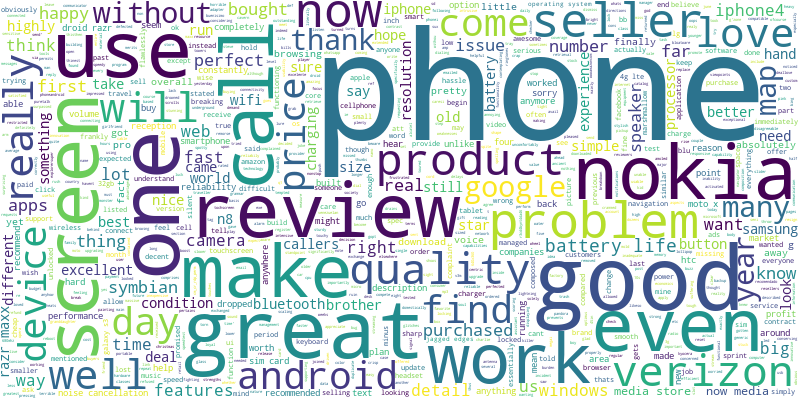

In [7]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df['review_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## Lemmatization()

In [8]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):  # texts is the list with 252 elements
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = [] 
    for text in texts:  # for every element (lets think of this element as a review) in texts
        doc = nlp(text) # doc is sorta like tokenizing, but we do get punctuation marks also so more like split()
        new_text = []  # this will be a list of lemmatized words in any review
        for token in doc: # doc is a list of tokenized words
            if token.pos_ in allowed_postags: # can also add if not token.is_punct to remove punctuations
                new_text.append(token.lemma_) 
        final = " ".join(new_text) # this is a string, all lemmatized words joined by spaces
        texts_out.append(final) # string of all the 252 reviews will be added here
    return (texts_out)

In [9]:
data = df.review_text_processed.values.tolist() # strings of all reviews in one list

In [10]:
data

['this is a great slider that boost has i have had sprint for over 5 years and finally decided to make a change because of the high bills so far so good very sturdy',
 'good',
 "great phone speakers and camera are terrible but those were 2 things i didn't care for to begin with and it runs stock android with very little bloatware so it's awesome",
 'this is trash  why is any tochscreen android not whatsapp compatible\ni know it seni-ancient but no update  i may be wrong but who caresi got a touchscreen i cant use & will now have to sell cheap of gift',
 "happy so far doesn't come with nano sim card so make sure you have one att doesn't charge for them also charger and cord def don't work in us so make sure you have a 2 amp charger",
 'great phone no issues',
 "it is in fact samsung galaxy s3's younger brother it looks and feels pretty good on your hands especially if you don't have big enough hands if you find the regular size galaxy s3 uncomfortably big this is the right cellphone for

In [11]:
lemmatized_texts = lemmatization(data)

In [12]:
data[1]

'good'

## Removing stopwords, punctuation marks

In [13]:
#import gensim
#from gensim.utils import simple_preprocess
#import nltk
#nltk.download('stopwords')
#from nltk.corpus import stopwords

stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences): # this uses simple_preprocess, which uses tokenize() internally, hence sent to words
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) # deacc=True removes punctuations and accents, like café will be converted to cafe

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [14]:
#data = df.review_text_processed.values.tolist() # strings of all reviews in one list
data_words = list(sent_to_words(lemmatized_texts))

# remove stop words
data_words = remove_stopwords(data_words)

### How all this is working

In [15]:
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
data_trial = ['hi! my name is suryam.', 'and this is my friend, yash, who likes to sit in a café.']

In [17]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuation marks and accents, like café will be converted to cafe
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [18]:
data_words_trial = list(sent_to_words(data_trial))
data_words_trial

[['hi', 'my', 'name', 'is', 'suryam'],
 ['and',
  'this',
  'is',
  'my',
  'friend',
  'yash',
  'who',
  'likes',
  'to',
  'sit',
  'in',
  'cafe']]

In [19]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [20]:
data_words_trial = remove_stopwords(data_words_trial)
data_words_trial

[['hi', 'name', 'suryam'], ['friend', 'yash', 'likes', 'sit', 'cafe']]

### Main dataset work resume

In [21]:
len(data_words)

54

In [22]:
print(data_words[0])

['great', 'slider', 'boost', 'sprint', 'year', 'finally', 'decide', 'make', 'change', 'high', 'bill', 'far', 'good', 'sturdy']


## Unique Words and their frequency (Bag of Words)

In [23]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

#### Viewing unique words and their frequency of the first review

In [24]:
id_words = [[(id2word[id], count) for id, count in line] for line in corpus]
print(id_words[0])

[('bill', 1), ('boost', 1), ('change', 1), ('decide', 1), ('far', 1), ('finally', 1), ('good', 1), ('great', 1), ('high', 1), ('make', 1), ('slider', 1), ('sprint', 1), ('sturdy', 1), ('year', 1)]


In [25]:
print(data_words[0])

['great', 'slider', 'boost', 'sprint', 'year', 'finally', 'decide', 'make', 'change', 'high', 'bill', 'far', 'good', 'sturdy']


## LDA Model

In [26]:
# Ref - https://radimrehurek.com/gensim/models/ldamodel.html
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [27]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())

[(0,
  '0.008*"thank" + 0.008*"awesome" + 0.001*"phone" + 0.001*"product" + '
  '0.001*"review" + 0.001*"good" + 0.001*"problem" + 0.001*"seller" + '
  '0.001*"get" + 0.001*"perfect"'),
 (1,
  '0.050*"phone" + 0.010*"come" + 0.010*"call" + 0.010*"nokia" + '
  '0.010*"iphone" + 0.009*"make" + 0.009*"great" + 0.009*"good" + '
  '0.009*"battery" + 0.007*"screen"'),
 (2,
  '0.018*"great" + 0.014*"big" + 0.010*"good" + 0.010*"make" + 0.009*"year" + '
  '0.009*"hand" + 0.009*"brother" + 0.008*"work" + 0.006*"phone" + '
  '0.005*"call"'),
 (3,
  '0.054*"phone" + 0.018*"review" + 0.015*"good" + 0.015*"seller" + '
  '0.011*"use" + 0.011*"get" + 0.011*"verizon" + 0.010*"product" + 0.008*"buy" '
  '+ 0.008*"even"'),
 (4,
  '0.056*"phone" + 0.011*"get" + 0.011*"device" + 0.011*"recommend" + '
  '0.010*"work" + 0.009*"screen" + 0.009*"buy" + 0.009*"android" + '
  '0.009*"well" + 0.007*"battery"')]


In [28]:
pyLDAvis.enable_notebook(local=True)
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.020450  0.132558       1        1  40.919697
3      0.020993 -0.127472       2        1  28.786513
4     -0.117486 -0.025783       3        1  25.066841
2      0.087382  0.004519       4        1   5.012818
0      0.029561  0.016177       5        1   0.214131, topic_info=       Term       Freq      Total Category  logprob  loglift
523   thank   5.000000   5.000000  Default  30.0000  30.0000
7     great  11.000000  11.000000  Default  29.0000  29.0000
357  review  10.000000  10.000000  Default  28.0000  28.0000
193  seller   8.000000   8.000000  Default  27.0000  27.0000
301  iphone   7.000000   7.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
321     map   0.004920   5.475359   Topic5  -6.5940  -0.8683
63     find   0.004908   6.309037   Topic5  -6.5965  -1.0125
620  detail   0.004905   4.328073   Topic5  -6.5972  -0.6363
331  number   0.004900   5.256743   Topic5  -6.5981  -0.8317
131  screen   0.004897  10.713855   Topic5  -6.5988  -1.5444

[326 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
437       1  0.913160        ad
727       3  0.779336  addition
42        1  0.436175      also
42        2  0.290783      also
42        3  0.145392      also
...     ...       ...       ...
413       1  0.782995     world
41        3  0.988797     wrong
13        1  0.568107      year
13        2  0.378738      year
13        4  0.189369      year

[296 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 5, 3, 1])

In [29]:
"""# Ref - https://neptune.ai/blog/pyldavis-topic-modelling-exploration-tool-that-every-nlp-data-scientist-should-know
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\\nCoherence Score: ', coherence_lda)  # the higher the better"""

"# Ref - https://neptune.ai/blog/pyldavis-topic-modelling-exploration-tool-that-every-nlp-data-scientist-should-know\ncoherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')\ncoherence_lda = coherence_model_lda.get_coherence()\nprint('\\nCoherence Score: ', coherence_lda)  # the higher the better"

In [30]:
if __name__ == "__main__":

     coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, 
                                                          dictionary=id2word, 
                                                              coherence='c_v')
     coherence_lda = coherence_model_lda.get_coherence()
     print('\nCoherence Score: ', coherence_lda)

D:\Softwares\Anaconda\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
D:\Softwares\Anaconda\lib\site-packages\gensim\topic_coherence\indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))



Coherence Score:  nan


In [31]:
# Function for training multiple models - Ref - https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#17howtofindtheoptimalnumberoftopicsforlda
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        #model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [32]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words, start=2, limit=20, step=6)

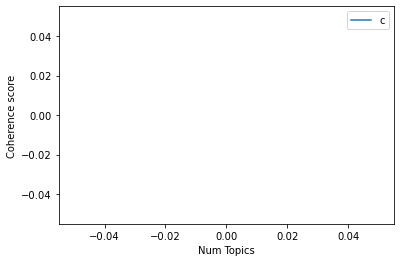

In [33]:
# Show graph
limit=20; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [34]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of nan
Num Topics = 8  has Coherence Value of nan
Num Topics = 14  has Coherence Value of nan
